In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


#  coefficient quantization matrix
#  You can decide this by yourself.
quantization = [[5, 5, 5, 5, 5, 5, 5, 5],
                [5, 5, 5, 5, 5, 5, 5, 5],
                [5, 5, 5, 5, 5, 5, 5, 5],
                [5, 5, 5, 5, 5, 5, 5, 5],
                [5, 5, 5, 5, 5, 5, 5, 5],
                [5, 5, 5, 5, 5, 5, 5, 5],
                [5, 5, 5, 5, 5, 5, 5, 5],
                [5, 5, 5, 5, 5, 5, 5, 5]]


# Forward DCT (8 × 8）
# The image need to be divided into 8×8 blocks firstly, and then transform each image subblock into DCT domain.
# For each image subblock in DCT domain, the coefficient in the location (0, 0) is the DC coefficient, others are AC coefficients.

def dct(img):
    img_data = img.astype(float)
    m, n = img_data.shape
    img_dct = np.zeros(img.shape)
    x_batchsize = int(m/8)
    y_batchsize = int(n/8)
    print ('m = ', m)
    print ('n = ', n)
    print (x_batchsize)
    print (y_batchsize)
    
    lis_dct = []
    x = 0
    F = 0
    lis_F = []
    TF = 0
    lis_selected = []

    for i in range(0,x_batchsize):
        for j in range(0,y_batchsize):
            window_x_s = i * 8
            window_x = (i+1) * 8
            window_y_s = j * 8
            window_y = (j+1) * 8
            img_dct[window_x_s:window_x, window_y_s:window_y] = cv2.dct(img_data[window_x_s:window_x,window_y_s:window_y]) / quantization
            lis_dct = cv2.dct(img_data[window_x_s:window_x,window_y_s:window_y]) / quantization
            y = 0
            sum_coeff = 0
            for l in lis_dct:
                for k in l:
                    if y == 0:
                        y += 1
                        continue
                    else:
                        y += 1
                        sum_coeff += (k * k)
#             print ('sum_coeff = ', sum_coeff)
            F = sum_coeff/64
            # Indexes of selected blocks inserted in a list, useful while traversing later
            if F < TF:
                lis_selected.append((i, j))
            lis_F.append(F)
            if x < 5:
                print (F)
                x += 1
#                 print ('y = ', y)

#             if x < 1:
#                 print (img_data[window_x_s:window_x,window_y_s:window_y])
#                 print (cv2.dct(img_data[window_x_s:window_x,window_y_s:window_y]) / quantization)
#                 x = x + 1
    print (lis_F)
    return img_dct


m =  2100
n =  1179
262
147
62.3298339844
60.51375
0.46375
0.7299609375
1.02897460938
[62.329833984375028, 60.513750000000009, 0.46374999999999983, 0.72996093750000013, 1.028974609375001, 1.1785937499999994, 87.602099609374989, 76.628750000000068, 27.468662109375018, 48.133349609374967, 3.4148437500000028, 0.0, 49.984335937499992, 0.78808593749999978, 1.2280371093750013, 34.824912109375013, 36.424443359374997, 68.278896484375011, 28.388740234375017, 58.935302734374979, 1.5987500000000026, 2.1875000000000009, 0.62061523437499999, 0.31749999999999956, 0.53741210937499995, 0.94746093749999927, 1.1846777343750003, 0.64397460937499995, 0.69621093750000029, 9.9399121093750011, 1.9505859375000003, 0.77746093749999956, 1.0917871093749993, 24.292177734374985, 32.668710937500009, 56.366162109375026, 46.487490234374995, 2.6971777343750007, 69.725615234374985, 33.358115234374999, 43.173583984375014, 9.1681152343749943, 15.123349609374998, 1.0780859374999996, 1.2687499999999996, 1.3949609374999985,

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

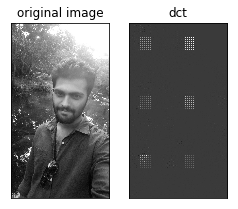

In [4]:
img = cv2.imread('github.jpeg', 0)

# DCT
img_dct = dct(img)
# print (img_dct[0][0], img_dct[0][1])
# print (img_dct[0][8], img_dct[0][9])
# print (img_dct[0][16], img_dct[0][17])
# print (img_dct[0][24], img_dct[0][25])
# print (img_dct.shape)


# m, n = img_data.shape
# img_dct = np.zeros(img.shape)
# x_batchsize = int(m/8)
# y_batchsize = int(n/8)

# for i in range(0,x_batchsize):
#     for j in range(0,y_batchsize):
#         window_x_s = i * 8
#         window_x = (i+1) * 8
#         window_y_s = j * 8
#         window_y = (j+1) * 8
        

plt.subplot(131)
plt.imshow(img, 'gray')
plt.title('original image')
plt.xticks([]), plt.yticks([])

plt.subplot(132)
plt.imshow(img_dct, 'gray')
plt.title('dct')
plt.xticks([]), plt.yticks([])